In [1]:
import heeps
from heeps.wavefront import show_wf
import proper

In [2]:
# initialize conf dict
conf = heeps.config.read_config(verbose=False)

# here are update values for MIRAC5    
conf['band_specs']['N2'] = {
    'lam': 12.00e-6,
    'pscale': 19,
    'flux_star': 4.57e+08,   # 5.83e+9 for star mag=-2.765  #calculated for mag = 0 (reference in code)
    'flux_bckg': 6.3e+07,
}
conf.update(
    mode = 'CVC',
    band = 'N2',
    pupil_img_size = 7,           # pupil image in m (for PROPER)
    diam_nominal = 6.5,              # nominal diameter (for LS oversizing)
    diam_ext = 6.5,                  # effective outer circular aperture in m
    diam_int = 1,                  # effective central obscuration in m
    diam_vpm = 6.5,                  # vortex phase mask (19/45*diam_nominal)
    diam_lom = 6.5,                  # lyot occulting mask (19/45*diam_nominal)
    f_pupil = '',                    # entrance pupil file (need to update once I get info of MIRAC-5)
    spi_width = 0.1,                   # spider width in m
    spi_angles = [0,90,180,270],      # spider angles in deg
    seg_width = 0,
    seg_gap = 0,
    ls_ext_circ = True, 
    ls_int_circ = True, 
    ls_dRext = .02,
    ls_dRint = .02,
    ls_dRspi = .02,
)

Simulation config: band=N2, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0769, beam_ratio=0.0499
   npupil=55, pscale=19.0000 mas, lam=1.2005E-05 m
   hfov=1.09 arcsec (-> ndet=115, 2.87 lam/D)

Off-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=2 (nframes=2, nstep=1)
Create off-axis PSF cube
   apply Lyot stop: circ_ext/int=[True, True], ls_dRext/int/spi=[0.02, 0.02, 0.02], ls_misalign=None
   2024-11-18 15:42:18, e2e simulation using 12 cores
   2024-11-18 15:42:20, completed in 1.75 seconds
Average PSF cube

PROPER ngrid = 1024


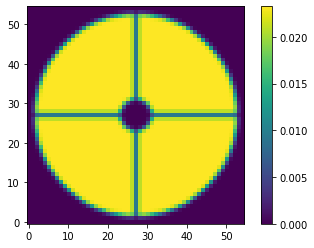

In [3]:
conf['ngrid'] = 1024
conf = heeps.config.update_config(saveconf=False, verbose=True, **conf)

wf = heeps.pupil.pupil(**conf)
show_wf(wf, 'amp', npupil=conf['npupil']);
heeps.wavefront.propagate(wf, onaxis=False, avg=True, savefits=True, verbose=True, **conf);
print('PROPER ngrid = %s'%proper.n)

Simulation config: band=N2, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0769, beam_ratio=0.0503
   npupil=111, pscale=19.0000 mas, lam=1.1897E-05 m
   hfov=1.09 arcsec (-> ndet=115, 2.89 lam/D)

Off-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=2 (nframes=2, nstep=1)
Create off-axis PSF cube
   apply Lyot stop: circ_ext/int=[True, True], ls_dRext/int/spi=[0.02, 0.02, 0.02], ls_misalign=None
   2024-11-18 15:42:22, e2e simulation using 12 cores
   2024-11-18 15:42:30, completed in 7.58 seconds
Average PSF cube

PROPER ngrid = 2048


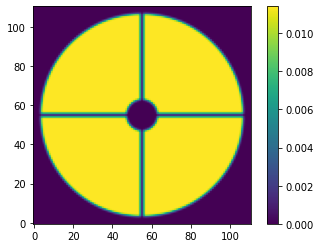

In [4]:
conf['ngrid'] = 2*1024
conf = heeps.config.update_config(saveconf=False, verbose=True, **conf)

wf = heeps.pupil.pupil(**conf)
show_wf(wf, 'amp', npupil=conf['npupil']);
heeps.wavefront.propagate(wf, onaxis=False, avg=True, savefits=True, verbose=True, **conf);
print('PROPER ngrid = %s'%proper.n)